In [17]:

from river import datasets
from river import evaluate
from river import metrics
from river import preprocessing
from river import neighbors
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from river import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [6]:
#load the dataset
dataset = pd.read_csv('Customer_Behaviour.csv')

In [8]:
import pandas as pd

# Load the CSV file using pandas
data = pd.read_csv('Customer_Behaviour.csv')

# Print the column names
print(data.columns)



Index(['User_ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [18]:
# Initialize the preprocessor and classifier
preprocessor = preprocessing.StandardScaler()
classifier = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Initialize the KNN classifier
model = (
    preprocessing.StandardScaler() |
    KNeighborsClassifier(n_neighbors=3)
)

In [10]:

# Initialize the accuracy metric
metric = metrics.Accuracy()



In [20]:
# Separate features and target variable
X = data.drop('Purchased', axis=1)
y = data['Purchased']

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Separate features and target variable
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Perform one-hot encoding on categorical features
categorical_features = ['Gender']  # Replace with the actual categorical feature(s) in your dataset
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Concatenate the encoded features with numerical features
X_processed = np.concatenate((X_encoded, X.drop(categorical_features, axis=1)), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')


Accuracy: 0.7875


c:\Users\Galaxy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


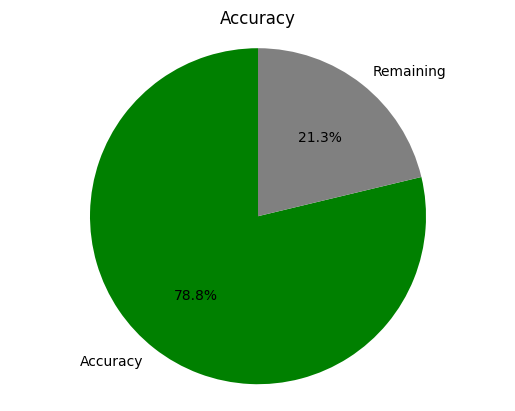

In [28]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = 78.75

# Create a list with accuracy and remaining percentage
accuracies = [accuracy, 100 - accuracy]

# Labels for each category
labels = ['Accuracy', 'Remaining']

# Colors for each category
colors = ['green', 'gray']

# Create the pie chart
plt.pie(accuracies, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Accuracy')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


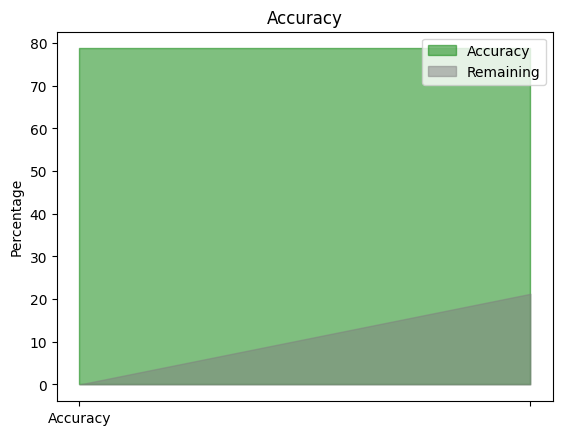

In [29]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = 78.75

# Calculate remaining percentage
remaining = 100 - accuracy

# Create x-axis values
x = [0, 1]

# Create y-axis values
y1 = [accuracy, accuracy]
y2 = [0, remaining]

# Create the area chart
plt.fill_between(x, y1, alpha=0.5, color='green', label='Accuracy')
plt.fill_between(x, y2, alpha=0.5, color='gray', label='Remaining')

# Set x-axis labels
plt.xticks(x, ['Accuracy', ''])

# Set y-axis label
plt.ylabel('Percentage')

# Add a title
plt.title('Accuracy')

# Display the legend
plt.legend()

# Display the area chart
plt.show()


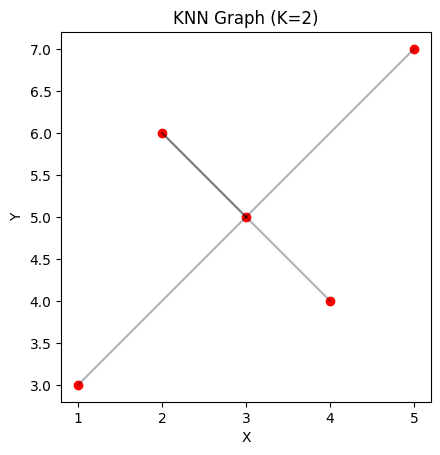

In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from matplotlib import lines

def knn_graph(data, k):
    # Creating KNN graph
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, indices = neigh.kneighbors(data)

    # Plotting the graph
    plt.figure()
    plt.gca().set_aspect('equal', adjustable='box')
    
    for i in range(len(indices)):
        x = [data[i, 0]] * k + data[indices[i], 0].tolist()
        y = [data[i, 1]] * k + data[indices[i], 1].tolist()
        
        plt.plot(x, y, 'k-', alpha=0.3)
        plt.scatter(data[i, 0], data[i, 1], color='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'KNN Graph (K={k})')
    plt.show()

# Example usage
data = np.array([[1, 3], [2, 6], [3, 5], [4, 4], [5,7]])
k = 2

knn_graph(data, k)
